<a href="https://colab.research.google.com/github/Tsinta-Developers/AprendizajeReconocimientodePatrones/blob/main/Tarea5AyRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   M. Concepción Mota Martínez
2.   Guillermo Francisco García Acosta



#Tarea 5: Selección de modelos, determinación de $\alpha$ y $\beta$ usando el modelo de evidencia.


1.   Genere 10 puntos de entrenamiento con la función sinusoidal y agregar ruido Gaussiano, de manera iterativa ajustar con un polinomio de grado 9 regularizado. Con la ecuación 
$\frac{1}{2}\sum_{n=1}^N[{t_n}-w^T\phi(x_n)]^2+\frac{\lambda}{2}w^Tw$ y con la ecuación $w=(\lambda I+\Phi^T\Phi)^{-1}\Phi^Tt$

2. Tomar inicialmente a $\alpha=0.005$ y $\beta=11.1$ para generar el ruido, sin embargo para estimación inicial tome 10, para iniciar el proceso iterativo.
3. Aplicar un proceso iterativo para encontrar $\alpha$ mediante la ecuación $\alpha=\frac{\gamma}{m^T_N m_N}$ y $\gamma$ mediante la ecuación $\gamma=\sum_i \frac{\lambda_i}{\alpha+\lambda_i}$.
4. Graficar el polinomio de grado 9 regularizado con la mejor $\alpha$ que se encontró.
5. Graficar los valores que va tomando $\alpha$ desde el inicio hasta su convergencia.
6. Graficar los valores que va tomando $\gamma$ desde el inicio hasta su convergencia.
7. $\gamma$ corresponde con el número de parámetros bien determinados por los datos.
8. Analice los eigenvalores $\lambda$ y vea que parámetros estan bien determinados, escriba que parámetros estan bien determinados y cuales no.
9. Grafique la interpolación solo con los terminos del polinomio que están bien determinados.
10. Repetir el punto 1 con 30 puntos generados aleatoriamente.
11. Calcule $\frac{1}{\beta}$ con 3 métodos:


*   ML, ecuación $\sigma^2_{ML}=\frac{1}{N}\sum_{n=1}^N(x_n-\mu_{ML})^2$.
*   MAP, ecuación $\sigma^2_{MAP}=\frac{1}{N-1}\sum_{n=1}^N(x_n-\mu_{ML})^2$.
*   Evidencia aproximada $\frac{1}{\beta}=\frac{1}{N-\gamma}\sum_{n=1}^N[t_n-m_N^T\phi(x_n)]^2$. Y concluir cual es el método que da mejores resultados.

12. Repetir el ejercicio 1 solo que usar una base de funciones con Gaussianas en lugar de polinomios.
13. Para el óptimo del caso 1 y el óptimo del caso 2 calculé el logaritmo de verosimilitud marginal (ecuación $\ln p(t|\alpha,\beta)=\frac{M}{2}\ln \alpha+\frac{N}{2}\ln \beta-E(m_N)-\frac{1}{2}\ln|A|-\frac{N}{2}\ln(2\pi)$) y concluya cual de los dos modelos tiene mayor evidencia.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
class LinearModel(object):
  """A generic linear regressor. Uses nonlinear basis functions"""
  def __init__(self, basisfunc=None):
    """Instantiate a linear regressor. If you want to use a custom basis function,
    specifity it here. It should accept an array and output an array. The default 
    basis function is the identity function"""
    self.w=np.array([])
    self.basisfunc=basisfunc if basisfunc is not None else self.identity
  
  def identity(self, x):
    #Identify basis function -for linear models in x
    return x
  
  def basismap(self, X):
    #Return X in the new basis (the design matrix)
    Xn=np.zeros((X.shape[0], self.basisfunc(X[0,:]).shape[0]))
    for i, xi in enumerate(X):
      Xn[i,:]=self.basisfunc(xi)
    return Xn
  
  def fit_gd(self, X, y, itrs=100, learning_rate=0.1, regularization=0.1):
    """Fit using iterative gradient descent with least squeres loss
    itrs-iterations of gd
    learning_rate-learning_rate for updates
    regularization-weight decay. Greated values->more regularization"""
        
    #First get a new basis by using our basis func
    Xn=self.basismap(X)
    
    #initial weights
    self.w=np.random.unifom(-0.1, 0.1, (Xn.shape[1],1))
        
    #now optimize in this space, using gradient descent
    print('Initial loss:', self.loss(X,y))
        
    for i in range(itrs):
      grad=self.grad(Xn, y, regularization)
      self.w=self.w-learning_rate*grad
        
    print('Final loss:', self.loss(X,y))

  def grad(self, X, y, reg):
    """Returns the gradient of loss function with respect to the weights.
    Used in gradient descent training"""
    return -np.mean((y-np.dot(X, self.w))*X, axis=0).reshape(self.w.shape)+reg*self.w
    
  def fit_normal_eqns(self, X, y, reg=1e-5):
    """Solves for the weights using the normal equation"""
    Xn=self.basismap(X)
    self.w=np.dot(np.dot(np.linalg.inv(np.eye(Xn.shape[1])*reg+np.dot(Xn.T, Xn)), Xn.T), y)
    
  def predict(self, X):
    """"Makes predictions on a matrix of (observations x features)"""
    Xn=self.basismap(X)
    return np.dot(Xn, self.w)
    
  def loss(self, X, y):
    #Assumes that X is the data matrix (not the design matrix)
    yh=self.predict(X)
    return np.mean((yh-y)**2)

In [ ]:
def gaussian_basis9(x):
  return np.hstack(tuple(np.exp(-((x-mu)**2)/(2*(0.1**2)))) for mu in np.arange(0,1,1/9))

In [ ]:
def gaussian_basis4(x):
  return np.hstack(tuple(np.exp(-((x-mu)**2)/(2*(0.1**2)))) for mu in np.arange(0,1,1/4))

In [ ]:
def gaussian_basis3(x):
  return np.hstack(tuple(np.exp(-((x-mu)**2)/(2*(0.1**2)))) for mu in np.arange(0,1,1/3))

In [ ]:
def polynomial_basis_function4(x):
    #M = 9
    M = 4
    Ms = range(M + 1)
    return x ** Ms[1:]

In [ ]:
def polynomial_basis_function3(x):
    #M = 9
    M = 3
    Ms = range(M + 1)
    return x ** Ms[1:]

In [ ]:
def polynomial_basis_function9(x):
    M = 9
    #M = 4
    Ms = range(M + 1)
    return x ** Ms[1:]

In [ ]:
# Proceso iterativo
def fit(Phi, t, alpha_0=1e-5, beta_0=1e-5, max_iter=200, rtol=1e-5, verbose=False):
    """
    Jointly infers the posterior sufficient statistics and optimal values 
    for alpha and beta by maximizing the log marginal likelihood.
    
    Args:
        Phi: Design matrix (N x M).
        t: Target value array (N x 1).
        alpha_0: Initial value for alpha.
        beta_0: Initial value for beta.
        max_iter: Maximum number of iterations.
        rtol: Convergence criterion.
        
    Returns:
        alpha, beta, posterior mean, posterior covariance.
    """
    
    N, M = Phi.shape
    eigenvalues_0 = np.linalg.eigvalsh(Phi.T.dot(Phi))
    

    beta = beta_0
    alpha_list = []
    alpha = alpha_0
    gamma_list = []
    list_eigenvalues = []
    amm_list = []

    for i in range(max_iter):
        beta_prev = beta
        alpha_prev = alpha

        eigenvalues = eigenvalues_0 * beta
        list_eigenvalues.append(eigenvalues)

        m_N, S_N, S_N_inv = posterior(Phi, t, alpha, beta, return_inverse=True)

        gamma = np.sum(eigenvalues / (eigenvalues + alpha))
        gamma_list.append(gamma)
        alpha = gamma / np.sum(m_N ** 2)
        alpha_list.append(alpha)

        amm = M - (alpha*np.sum(1 / (eigenvalues + alpha)))
        amm_list.append(amm)

        beta_inv = 1 / (N - gamma) * np.sum((t - Phi.dot(m_N)) ** 2) #Ec. 3.95 Bishop
        beta = 1 / beta_inv #Ec. 3.95 Bishop

        betaml_inv = 1 / (N) * np.sum((t - Phi.dot(m_N)) ** 2) #Ec. 3.95 Bishop
        betaml = 1 / betaml_inv #Ec. 3.95 Bishop

        betamap_inv = 1 / (N-1) * np.sum((t - Phi.dot(m_N)) ** 2) #Ec. 3.95 Bishop
        betamap = 1 / betamap_inv #Ec. 3.95 Bishop

        if np.isclose(alpha_prev, alpha, rtol=rtol) and np.isclose(beta_prev, beta, rtol=rtol):
            if verbose:
                print(f'Convergence after {i + 1} iterations.')
            return amm_list, alpha, beta, betaml, betamap, m_N, S_N, alpha_list,gamma_list,list_eigenvalues

    if verbose:
        print(f'Stopped after {max_iter} iterations.')
    return amm_list, alpha, beta, betaml, betamap, m_N, S_N,alpha_list,gamma_list,list_eigenvalues

In [ ]:
def posterior(Phi, t, alpha, beta, return_inverse=False):
    """Computes mean and covariance matrix of the posterior distribution."""
    S_N_inv = alpha * np.eye(Phi.shape[1]) + beta * Phi.T.dot(Phi)
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N.dot(Phi.T).dot(t)

    if return_inverse:
        return m_N, S_N, S_N_inv
    else:
        return m_N, S_N

In [ ]:

def posterior_predictive(Phi_test, m_N, S_N, beta):
    """Computes mean and variances of the posterior predictive distribution."""
    y = Phi_test.dot(m_N)
    # Only compute variances (diagonal elements of covariance matrix)
    y_var = 1 / beta + np.sum(Phi_test.dot(S_N) * Phi_test, axis=1)
    
    return y, y_var

In [ ]:
# calculé el logaritmo de verosimilitud marginal (Ecuación (3.86))
def log_marginal_likelihood(Phi, t, alpha, beta):
    """Computes the log of the marginal likelihood."""
    N, M = Phi.shape

    m_N, _, S_N_inv = posterior(Phi, t, alpha, beta, return_inverse=True)
    
    E_D = beta * np.sum((t - Phi.dot(m_N)) ** 2)
    E_W = alpha * np.sum(m_N ** 2)
    
    score = M * np.log(alpha) + \
            N * np.log(beta) - \
            E_D - \
            E_W - \
            np.log(np.linalg.det(S_N_inv)) - \
            N * np.log(2 * np.pi)

    return 0.5 * score

In [ ]:
#Esto fue lo que agregue para el calculo de los 30 puntos nuevos, si tienes duda me dices por fa

def mu_ML(yh, t):
  mean=0
  for i in range(len(yh)):
    mean+=(t[i]-yh[i])**2
  mML=mean/len(yh)
  return mML

def mu_MAP(yh, t):
  meanM=0
  for i in range(len(yh)):
    meanM+=(t[i]-yh[i])**2
  mMAP=meanM/len(yh)
  return mMAP

def beta_inv(Phi, t, alpha, beta, gamma):
  m_N,_,_=posterior(Phi, t, alpha, beta,return_inverse=True)
  beta_inv=1/(Phi.shape[0]-gamma)*np.sum((t-Phi.dot(m_N))**2)
  return beta_inv

In [ ]:
def plot_truth(x, y, label='Truth'):
    plt.plot(x, y, 'k--', label=label)

In [ ]:
def g(X, noise_variance):
    '''Sinusoidal function plus noise'''
    return np.sin(2 * np.pi * X) + noise(X.shape, noise_variance)
    
def noise(size, variance):
    return np.random.normal(scale=np.sqrt(variance), size=size)

# Inicio 10 puntos

In [ ]:
# beta_02 = 1 / (0.3 ** 2)
beta_02 = 1/11.1
beta_02

0.0900900900900901

In [ ]:
x_train=np.linspace(0,1,num=10).reshape((-1,1))
x_true=np.linspace(0,1,num=50).reshape((-1,1))
y_train=np.sin(2*x_train*np.pi)+beta_02*np.random.randn(x_train.shape[0],x_train.shape[1])
#y_train = g(x_train,beta_02)
y_true=np.sin(2*x_true*np.pi)

In [ ]:
model=LinearModel(basisfunc=polynomial_basis_function9)
model.fit_normal_eqns(x_train.reshape((-1,1)), y_train.reshape((-1,1)))
#y_test = g(x_test,beta_02)
yh=model.predict(x_train.reshape((-1,1)))
yh

array([[ 0.        ],
       [ 0.75715667],
       [ 1.01260267],
       [ 0.82662321],
       [ 0.3262127 ],
       [-0.30042464],
       [-0.82870978],
       [-1.03664612],
       [-0.73880872],
       [ 0.22244211]])

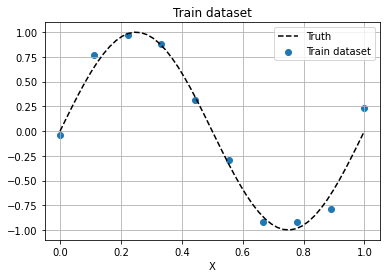

In [ ]:
plt.scatter(x_train,y_train, label='Train dataset')
plot_truth(x_true,y_true)
# plt.ylim([-1.2,1.2])
plt.xlabel('X')
plt.title('Train dataset')
plt.legend()
plt.grid()
#plt.plot(yh)

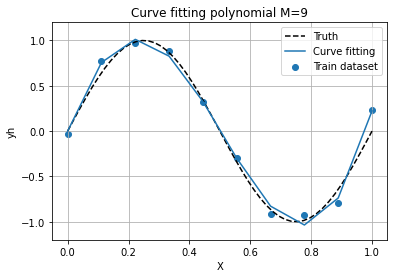

In [ ]:
plt.scatter(x_train,y_train,label='Train dataset')
plot_truth(x_true,y_true)
plt.plot(x_train,yh,label='Curve fitting')
plt.xlabel('X')
plt.ylabel('yh')
plt.title('Curve fitting polynomial M=9')
plt.legend()
plt.ylim([-1.2,1.2])
plt.grid()

In [ ]:
amm, alpha, beta, betaml, betamap, m_N, S_N, alpha_list, gamma_list, eigenvalues_list = fit(yh, y_train, alpha_0=.005, beta_0=1/10, verbose=True)

Convergence after 4 iterations.


In [ ]:
reg = np.linspace(-5,5,num=len(alpha_list))
regu = np.arange(0,9,1)

In [ ]:
1/beta, 1/betaml, 1/betamap

(0.0034199213521629974, 0.0030781702797390335, 0.003420189199710037)

In [ ]:
np.exp(-alpha)

0.36886951509980664

In [ ]:
negalpha_list = [ -x for x in alpha_list]
np.exp(negalpha_list)

array([0.3653444 , 0.368863  , 0.36886951, 0.36886952])

In [ ]:
neg_gamma_list = [ np.exp(-x)*10 for x in gamma_list]
neg_gamma_list

[3.716639111785589, 3.681453600455089, 3.681388478860588, 3.681388427732944]

In [ ]:
neg_eigenvalues_list = [ -x for x in eigenvalues_list]
eigenvalues_list.sort(reverse=True)
eigenvalues_list

[array([1413.87459533]),
 array([1413.87174678]),
 array([1392.48995402]),
 array([0.48353399])]

In [ ]:
ratio_list= []
for i in range(len(eigenvalues_list)):
  ratio = eigenvalues_list[i]/(eigenvalues_list[i] + np.exp(-alpha))
  ratio_list.append(ratio)

np.sum(ratio_list)

3.56647302701571

In [ ]:
print("Optimum degree is: {}".format(round(np.sum(ratio_list))))

Optimum degree is: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

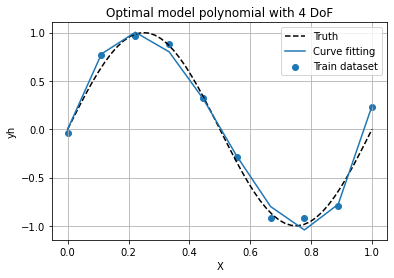

In [ ]:
model_v=LinearModel(basisfunc=polynomial_basis_function4)
model_v.fit_normal_eqns(x_train.reshape((-1,1)), y_train.reshape((-1,1)))
yhv=model_v.predict(x_train.reshape((-1,1)))

plt.figure()
plt.scatter(x_train, y_train, label='Train dataset')
plot_truth(x_true, y_true)
plt.plot(x_train,yhv, label='Curve fitting')
plt.xlabel('X')
plt.ylabel('yh')
plt.title('Optimal model polynomial with 4 DoF')
plt.legend()
plt.grid()
plt.savefig("Pol4.png",dpi=300)
files.download("Pol4.png")

In [ ]:
mvp=log_marginal_likelihood(yhv, y_train, np.exp(-alpha), 1/beta)
mvp

-37.60994757094603

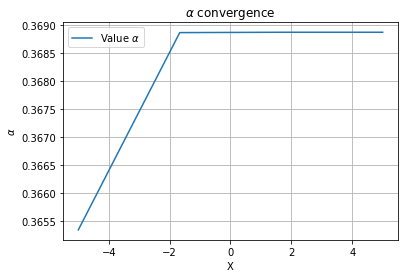

In [ ]:
plt.plot(reg,np.exp(negalpha_list), label=r'Value $\alpha$')
plt.xlabel('X')
plt.ylabel(r'$\alpha$')
plt.title(r'$\alpha$ convergence')
plt.legend()
plt.grid()

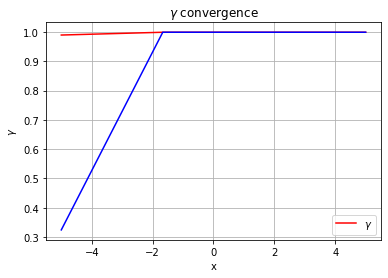

In [ ]:
plt.plot(reg,gamma_list,'r', label=r'$\gamma$')
plt.plot(reg, amm,'b')
plt.xlabel('x')
plt.ylabel(r'$\gamma$')
plt.title(r'$\gamma$ convergence')
plt.legend()
plt.grid()

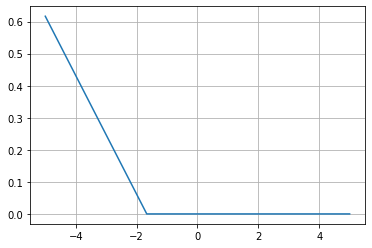

In [ ]:
plt.plot(reg,np.exp(neg_eigenvalues_list))
plt.grid()

In [ ]:
model.fit_normal_eqns(x_train, y_train,np.exp(-alpha))
yh1 =model.predict(x_train)
np.exp(-alpha)

0.36886951509980664

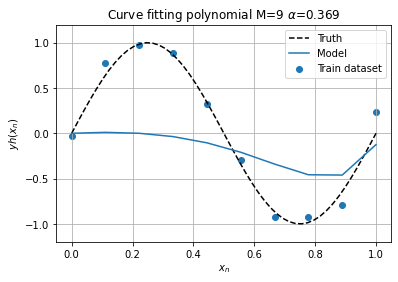

In [ ]:
plt.scatter(x_train,y_train, label='Train dataset')
plot_truth(x_true,y_true)
plt.plot(x_train,yh1, label='Model')
plt.xlabel(r'$x_n$')
plt.ylabel(r'$yh(x_n)$')
plt.title(r'Curve fitting polynomial M=9 $\alpha$={:.3f}'.format(np.exp(-alpha)))
plt.legend()
plt.ylim([-1.2,1.2])
plt.grid()
# plt.savefig("PolAlpha10.png",dpi=300)
# files.download("PolAlpha10.png")

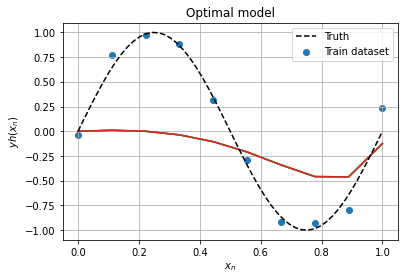

In [ ]:
yh_list = []
for i in range(0,len(alpha_list)):
  model.fit_normal_eqns(x_train, y_train,np.exp(-alpha_list[i]))
  yh1 =model.predict(x_train)
  yh_list.append(yh1)
  plt.plot(x_train,yh_list[i])

plt.scatter(x_train,y_train, label='Train dataset')
plot_truth(x_true,y_true)
plt.xlabel(r'$x_n$')
plt.ylabel(r'$yh(x_n)$')
plt.title('Optimal model')
plt.legend()
plt.grid()

# Modelos Funciones Gaussianas

In [ ]:
modelg=LinearModel(basisfunc=gaussian_basis9)
modelg.fit_normal_eqns(x_train, y_train)

yhg=modelg.predict(x_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


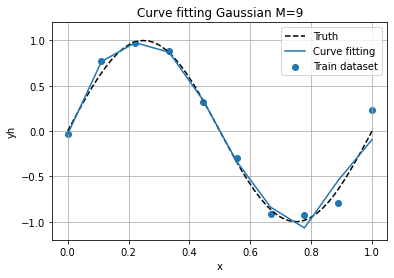

In [ ]:
plt.scatter(x_train,y_train, label='Train dataset')
plot_truth(x_true,y_true)
plt.plot(x_train,yhg, label='Curve fitting')
plt.ylim([-1.2,1.2])
plt.xlabel('x')
plt.ylabel('yh')
plt.title('Curve fitting Gaussian M=9')
plt.legend()
plt.grid()

In [ ]:
amm, alphag, betag, betamlg, betamapg, m_Ng, S_Ng, alpha_listg, gamma_listg, eigenvalues_listg = fit(yhg, y_train, alpha_0=.005, beta_0=1/10, verbose=True)

Convergence after 4 iterations.


In [ ]:
1/betag, 1/betamlg, 1/betamapg

(0.022063046042074475, 0.01986713379112214, 0.02207459310124682)

In [ ]:
np.exp(-alphag)

0.36614658252595794

In [ ]:
negalpha_listg = [ -x for x in alpha_listg]
np.exp(negalpha_listg)

array([0.36397736, 0.3661338 , 0.36614652, 0.36614658])

In [ ]:
neg_gamma_listg = [ -x for x in gamma_listg]
gamma_listg

[0.9894379980764214, 0.9952551100544065, 0.9952895213642489, 0.995289701505724]

In [ ]:
neg_eigenvalues_listg = [ -x for x in eigenvalues_listg]
eigenvalues_listg.sort(reverse=True)
eigenvalues_listg

[array([212.29847131]),
 array([212.29765403]),
 array([211.98977084]),
 array([0.4683951])]

In [ ]:
ratio_listg= []
for i in range(len(eigenvalues_listg)):
  ratiog = eigenvalues_listg[i]/(eigenvalues_listg[i] + np.exp(-alphag))
  ratio_listg.append(ratiog)

np.sum(ratio_listg)

3.5560926476628056

In [ ]:
print("Optimum degree is: {}".format(round(np.sum(ratio_listg))))

Optimum degree is: 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


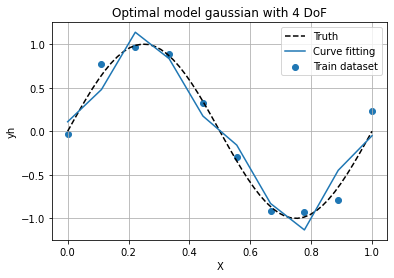

In [ ]:
model_vg=LinearModel(basisfunc=gaussian_basis4)
model_vg.fit_normal_eqns(x_train, y_train)
yhvg=model_vg.predict(x_train)

plt.figure()
plt.scatter(x_train, y_train, label='Train dataset')
plot_truth(x_true, y_true)
plt.plot(x_train, yhvg, label='Curve fitting')
plt.xlabel('X')
plt.ylabel('yh')
plt.title('Optimal model gaussian with 4 DoF')
plt.legend()
plt.grid()
# plt.savefig("Gauss4.png",dpi=300)
# files.download("Gauss4.png")

In [ ]:
mvg=log_marginal_likelihood(yhvg, y_train, np.exp(-alphag), 1/beta)
mvg

-37.60851225521042

In [ ]:
if (mvp>mvg):
  print('Optimal model is Gaussian')
else:
  print('Optimal model is Polynomial')

Optimal model is Polynomial


In [ ]:
modelg.fit_normal_eqns(x_train, y_train,np.exp(-alphag))
yh1g =modelg.predict(x_train)
np.exp(-alphag)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


0.36614658252595794

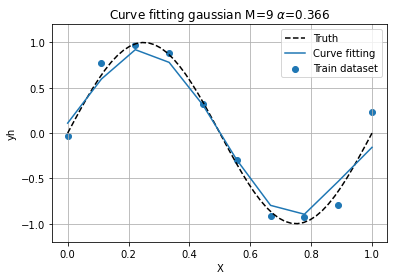

In [ ]:
plt.scatter(x_train,y_train,label='Train dataset')
plot_truth(x_true,y_true)
plt.plot(x_train,yh1g, label='Curve fitting')
plt.title(r'Curve fitting gaussian M=9 $\alpha$={:.3f}'.format(np.exp(-alphag)))
plt.xlabel('X')
plt.ylabel('yh')
plt.legend()
plt.ylim([-1.2,1.2])
plt.grid()
# plt.savefig("Gauss10.png",dpi=300)
# files.download("Gauss10.png")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Sup

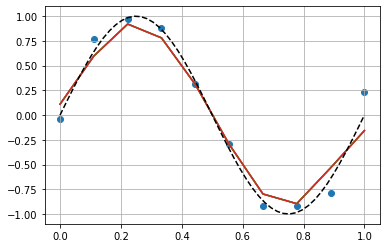

In [ ]:
yhg_list = []
for i in range(0,len(alpha_listg)):
  modelg.fit_normal_eqns(x_train, y_train,np.exp(-alpha_listg[i]))
  yh1g =modelg.predict(x_train)
  yhg_list.append(yh1g)
  plt.plot(x_train,yhg_list[i])

plt.scatter(x_train,y_train)
plot_truth(x_true,y_true)
plt.grid()

# Con 30 puntos Polinomios

In [ ]:
# beta_02 = 1 / (0.3 ** 2)
beta_02 = 1/11.1
beta_02

0.0900900900900901

In [ ]:
x_train=np.linspace(0,1,num=30).reshape((-1,1))
x_true=np.linspace(0,1,num=50).reshape((-1,1))
y_train=np.sin(2*x_train*np.pi)+beta_02*np.random.randn(x_train.shape[0],x_train.shape[1])
#y_train = g(x_train,beta_02)
y_true=np.sin(2*x_true*np.pi)

In [ ]:
model=LinearModel(basisfunc=polynomial_basis_function9)
model.fit_normal_eqns(x_train.reshape((-1,1)), y_train.reshape((-1,1)))
#y_test = g(x_test,beta_02)
yh=model.predict(x_train.reshape((-1,1)))
yh

array([[ 0.        ],
       [ 0.20835133],
       [ 0.40380531],
       [ 0.57924236],
       [ 0.72823952],
       [ 0.84524639],
       [ 0.9257597 ],
       [ 0.96648977],
       [ 0.96551133],
       [ 0.92239078],
       [ 0.83828157],
       [ 0.71597939],
       [ 0.5599286 ],
       [ 0.37617183],
       [ 0.17223478],
       [-0.04306099],
       [-0.2598639 ],
       [-0.46764261],
       [-0.65562529],
       [-0.8133314 ],
       [-0.93119795],
       [-1.00130085],
       [-1.0181699 ],
       [-0.97969448],
       [-0.88811444],
       [-0.75108888],
       [-0.58283275],
       [-0.40530881],
       [-0.24945956],
       [-0.15646094]])

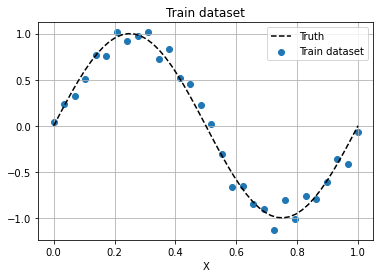

In [ ]:
plt.scatter(x_train,y_train, label='Train dataset')
plot_truth(x_true,y_true)
# plt.ylim([-1.2,1.2])
plt.xlabel('X')
plt.title('Train dataset')
plt.legend()
plt.grid()
#plt.plot(yh)

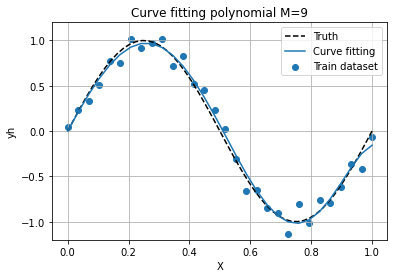

In [ ]:
plt.scatter(x_train,y_train,label='Train dataset')
plot_truth(x_true,y_true)
plt.plot(x_train,yh,label='Curve fitting')
plt.xlabel('X')
plt.ylabel('yh')
plt.title('Curve fitting polynomial M=9')
plt.legend()
plt.ylim([-1.2,1.2])
plt.grid()


In [ ]:
amm, alpha, beta, betaml, betamap, m_N, S_N, alpha_list, gamma_list, eigenvalues_list = fit(yh, y_train, alpha_0=.005, beta_0=1/10, verbose=True)

Convergence after 3 iterations.


In [ ]:
reg = np.linspace(-5,5,num=len(alpha_list))
regu = np.arange(0,9,1)

In [ ]:
1/beta, 1/betaml, 1/betamap

(0.008522750408119227, 0.008238828052139546, 0.008522925571178841)

In [ ]:
np.exp(-alpha)

0.3689314501797074

In [ ]:
negalpha_list = [ -x for x in alpha_list]
np.exp(negalpha_list)

array([0.36786225, 0.36893068, 0.36893145])

In [ ]:
neg_eigenvalues_list = [ -x for x in eigenvalues_list]
eigenvalues_list.sort(reverse=True)
eigenvalues_list

[array([1672.01163273]), array([1671.03142912]), array([1.42501389])]

In [ ]:
ratio_list= []
for i in range(len(eigenvalues_list)):
  ratio = eigenvalues_list[i]/(eigenvalues_list[i] + np.exp(-alpha))
  ratio_list.append(ratio)

np.sum(ratio_list)

2.7939049909310865

In [ ]:
print("Optimum degree is: {}".format(round(np.sum(ratio_list))))

Optimum degree is: 3


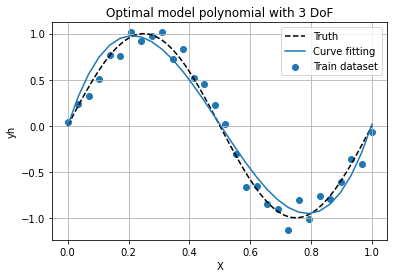

In [ ]:
model_v=LinearModel(basisfunc=polynomial_basis_function3)
model_v.fit_normal_eqns(x_train.reshape((-1,1)), y_train.reshape((-1,1)))
yhv=model_v.predict(x_train.reshape((-1,1)))

plt.figure()
plt.scatter(x_train, y_train, label='Train dataset')
plot_truth(x_true, y_true)
plt.plot(x_train,yhv, label='Curve fitting')
plt.xlabel('X')
plt.ylabel('yh')
plt.title('Optimal model polynomial with 3 DoF')
plt.legend()
plt.grid()
# plt.savefig("Pol3.png",dpi=300)
# files.download("Pol3.png")

In [ ]:
mvp=log_marginal_likelihood(yhv, y_train, np.exp(-alpha), 1/beta)
mvp

-99.23012285453328

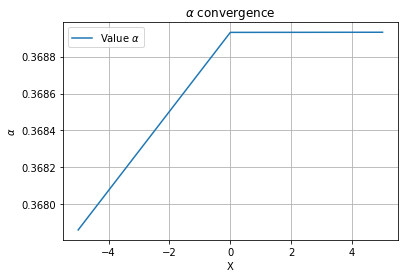

In [ ]:
plt.plot(reg,np.exp(negalpha_list), label=r'Value $\alpha$')
plt.xlabel('X')
plt.ylabel(r'$\alpha$')
plt.title(r'$\alpha$ convergence')
plt.legend()
plt.grid()

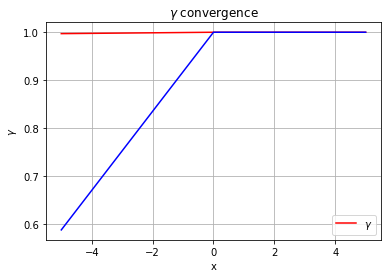

In [ ]:
plt.plot(reg,gamma_list,'r', label=r'$\gamma$')
plt.plot(reg, amm,'b')
plt.xlabel('x')
plt.ylabel(r'$\gamma$')
plt.title(r'$\gamma$ convergence')
plt.legend()
plt.grid()

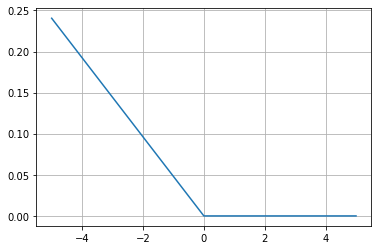

In [ ]:
plt.plot(reg,np.exp(neg_eigenvalues_list))
plt.grid()

In [ ]:
model.fit_normal_eqns(x_train.reshape((-1,1)), y_train.reshape((-1,1)),np.exp(-alpha))
yh1 =model.predict(x_train.reshape((-1,1)))
np.exp(-alpha)

0.3689314501797074

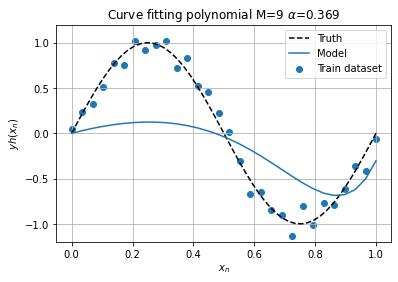

In [ ]:
plt.scatter(x_train,y_train, label='Train dataset')
plot_truth(x_true,y_true)
plt.plot(x_train,yh1, label='Model')
plt.xlabel(r'$x_n$')
plt.ylabel(r'$yh(x_n)$')
plt.title(r'Curve fitting polynomial M=9 $\alpha$={:.3f}'.format(np.exp(-alpha)))
plt.legend()
plt.ylim([-1.2,1.2])
plt.grid()
# plt.savefig("Pol30.png",dpi=300)
# files.download("Pol30.png")

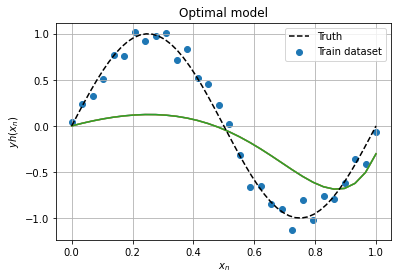

In [ ]:
yh_list = []
for i in range(0,len(alpha_list)):
  model.fit_normal_eqns(x_train, y_train,np.exp(-alpha_list[i]))
  yh1 =model.predict(x_train)
  yh_list.append(yh1)
  plt.plot(x_train,yh_list[i])

plt.scatter(x_train,y_train, label='Train dataset')
plot_truth(x_true,y_true)
plt.xlabel(r'$x_n$')
plt.ylabel(r'$yh(x_n)$')
plt.title('Optimal model')
plt.legend()
plt.grid()

# Con 30 puntos Gaussanios

In [ ]:
modelg=LinearModel(basisfunc=gaussian_basis9)
modelg.fit_normal_eqns(x_train, y_train)

yhg=modelg.predict(x_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


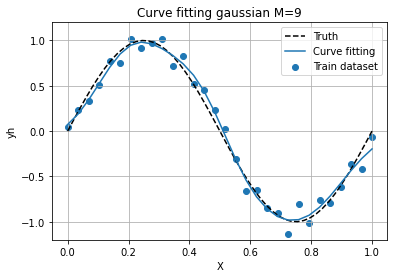

In [ ]:
plt.scatter(x_train,y_train, label='Train dataset')
plot_truth(x_true,y_true)
plt.plot(x_train,yhg, label='Curve fitting')
plt.xlabel('X')
plt.ylabel('yh')
plt.title('Curve fitting gaussian M=9')
plt.legend()
plt.ylim([-1.2,1.2])
plt.grid()

In [ ]:
amm, alphag, betag, betamlg, betamapg, m_Ng, S_Ng, alpha_listg, gamma_listg, eigenvalues_listg = fit(yhg, y_train, alpha_0=.005, beta_0=1/10, verbose=True)

Convergence after 3 iterations.


In [ ]:
1/betag, 1/betamlg, 1/betamapg

(0.0069630156351278925, 0.006731027777328998, 0.006963132183443791)

In [ ]:
np.exp(-alphag)

0.3677016191526124

In [ ]:
negalpha_listg = [ -x for x in alpha_listg]
np.exp(negalpha_listg)

array([0.36660018, 0.36770095, 0.36770162])

In [ ]:
neg_gamma_listg = [ -x for x in gamma_listg]
gamma_listg

[0.9965264925561992, 0.9995127796965179, 0.9995145923349613]

In [ ]:
neg_eigenvalues_listg = [ -x for x in eigenvalues_listg]
eigenvalues_listg.sort(reverse=True)
eigenvalues_listg

[array([2060.12333635]), array([2058.60578352]), array([1.43446719])]

In [ ]:
ratio_listg= []
for i in range(len(eigenvalues_listg)):
  ratiog = eigenvalues_listg[i]/(eigenvalues_listg[i] + np.exp(-alphag))
  ratio_listg.append(ratiog)

np.sum(ratio_listg)

2.795610122329509

In [ ]:
print("Optimum degree is: {}".format(round(np.sum(ratio_listg))))

Optimum degree is: 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


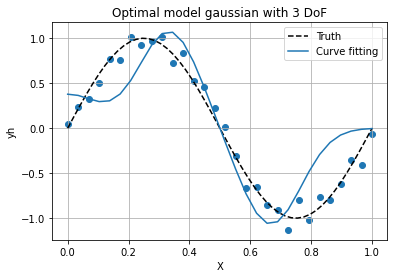

In [ ]:
model_vg=LinearModel(basisfunc=gaussian_basis3)
model_vg.fit_normal_eqns(x_train, y_train)
yhvg=model_vg.predict(x_train)

plt.figure()
plt.scatter(x_train, y_train)
plot_truth(x_true, y_true)
plt.plot(x_train, yhvg, label='Curve fitting')
plt.xlabel('X')
plt.ylabel('yh')
plt.title('Optimal model gaussian with 3 DoF')
plt.legend()
plt.grid()
# plt.savefig("Gauss3.png",dpi=300)
# files.download("Gauss3.png")

In [ ]:
mvg=log_marginal_likelihood(yhvg, y_train, np.exp(-alphag), 1/beta)
mvg

-99.2155778347695

In [ ]:
if (mvp>mvg):
  print('Optimal model is Gaussian')
else:
  print('Optimal model is Polynomial')

Optimal model is Polynomial


In [ ]:
modelg.fit_normal_eqns(x_train, y_train,np.exp(-alphag))
yh1g =modelg.predict(x_train)
np.exp(-alphag)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


0.3677016191526124

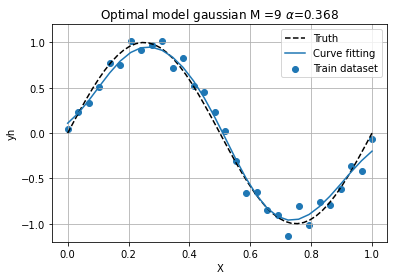

In [ ]:
plt.scatter(x_train,y_train, label='Train dataset')
plot_truth(x_true,y_true)
plt.plot(x_train,yh1g, label='Curve fitting')
plt.xlabel('X')
plt.ylabel('yh')
plt.title(r'Optimal model gaussian M =9 $\alpha$={:.3f}'.format(np.exp(-alphag)))
plt.legend()
plt.ylim([-1.2,1.2])
plt.grid()
# plt.savefig("Gauss30.png",dpi=300)
# files.download("Gauss30.png")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


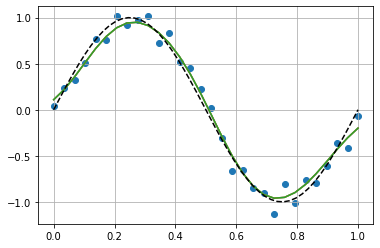

In [ ]:
yhg_list = []
for i in range(0,len(alpha_listg)):
  modelg.fit_normal_eqns(x_train, y_train,np.exp(-alpha_listg[i]))
  yh1g =modelg.predict(x_train)
  yhg_list.append(yh1g)
  plt.plot(x_train,yhg_list[i])

plt.scatter(x_train,y_train)
plot_truth(x_true,y_true)
plt.grid()

# Calcula $\frac{1}{\beta}$ con 3 métodos

In [ ]:
Smlp = mu_ML(yh,y_train)
Smlg = mu_ML(yhg,y_train)
Smlp, Smlg

(array([0.00824008]), array([0.00673092]))

In [ ]:
Smapp = mu_MAP(yh,y_train)
Smapg = mu_MAP(yhg,y_train)
Smapp, Smapg

(array([0.00824008]), array([0.00673092]))

In [ ]:
gammap = gamma_list[2]
gammag = gamma_listg[2]

In [ ]:
betainvp = beta_inv(yh,y_train,alpha,beta,gammap)
betainvg = beta_inv(yhg,y_train,alphag,betag,gammag)
betainvp, betainvg

(0.0085227504073643, 0.0069630156346907595)

In [ ]:
mvp1=log_marginal_likelihood(yh1, y_train, np.exp(-alpha), betainvp)
mvp1

-99.14149874723589

In [ ]:
mvg1=log_marginal_likelihood(yh1g, y_train, np.exp(-alphag), betainvg)
mvg1

-102.22902734721562

In [ ]:
if (mvp1>mvg1):
  print('Optimal model is Gaussian')
else:
  print('Optimal model is Polynomial')

Optimal model is Gaussian


In [ ]:
mvp2=log_marginal_likelihood(yhv, y_train, np.exp(-alpha), betainvp)
mvp2

-99.23012285584792

In [ ]:
mvg2=log_marginal_likelihood(yhvg, y_train, np.exp(-alphag), betainvg)
mvg2

-102.21936540575047

In [ ]:
if (mvp2>mvg2):
  print('Optimal model is Gaussian')
else:
  print('Optimal model is Polynomial')

Optimal model is Gaussian


In [ ]:
if (mvp1>mvg1):
  print('Optimal model is Gaussian infered alpha')
elif (mvp1>mvp2):
  print('Optimal model is Gaussian infered alpha')
elif (mvp1>mvg2):
  print('Optimal model is Gaussian infered alpha')
elif (mvg1>mvp1):
  print('Optimal model is Polynomial infered alpha')
elif (mvg1>mvp2):
    print('Optimal model is Polynomial infered alpha')
elif (mvg1>mvg2):
    print('Optimal model is Polynomial infered alpha')
elif (mvp2>mvg2):
  print('Optimal model is Gaussian gamma 3')
elif (mvp2>mvp1):
  print('Optimal model is Gaussian gamma 3')
elif (mvp2>mvg1):
  print('Optimal model is Gaussian gamma 3')
elif (mvg2>mvp1):
  print('Optimal model is Polinomial gamma 3')
elif (mvg2>mvp2):
  print('Optimal model is Polinomial gamma 3')
elif (mvg2>mvg1):
  print('Optimal model is Polinomial gamma 3')


Optimal model is Gaussian infered alpha


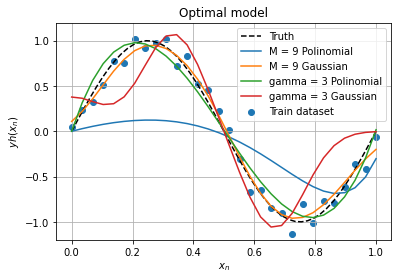

In [ ]:
plt.scatter(x_train,y_train,label='Train dataset')
plot_truth(x_true,y_true)
plt.plot(x_train,yh1,label='M = 9 Polinomial')
plt.plot(x_train,yh1g,label='M = 9 Gaussian')
plt.plot(x_train,yhv,label='gamma = 3 Polinomial')
plt.plot(x_train,yhvg,label='gamma = 3 Gaussian')
plt.xlabel(r'$x_n$')
plt.ylabel(r'$yh(x_n)$')
plt.title('Optimal model')
plt.legend()
plt.ylim([-1.2,1.2])
plt.grid()